In [1]:
import numpy as np
import matplotlib.pyplot as plt
import simtk.openmm as mm
import simtk.openmm.app as app
from simtk import unit

# Free Particle

The free particle is characterized for having no external potential goberning its motion. In the case of temperature and friction abscence the particle is moving in a uniform rectilineous trajectory. And when temperature and friction are present, we have nothing but a stochastic brownian particle or random walker characterized by magnitudes as diffusion.

## Working with this test system

The python class representing this test system is fully documented in [FreeParticle class API](../api/_autosummary/uibcdf_test_systems.FreeParticle.html). Let's see an example of how to interact with it:

In [2]:
from molecular_systems import FreeParticle

free_particle = FreeParticle(n_particles = 1, mass = 64 * unit.amu)

## Newtonian dynamics

In [3]:
system = free_particle.system
n_particles = system.getNumParticles()
initial_positions = free_particle.coordinates
initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds
initial_velocities[0,0] = 0.10 * unit.nanometers/unit.picoseconds

integration_timestep = 0.02 * unit.picoseconds
saving_timestep = 0.5 * unit.picoseconds
total_time = 10 * unit.picoseconds

steps_per_cicle = round(saving_timestep/integration_timestep)
n_steps = round(total_time/integration_timestep)
n_cicles = round(n_steps/steps_per_cicle)

# Integrator

temperature = 0.0*unit.kelvin
friction = 0.0/unit.picoseconds
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

# Platform

platform_name = 'CUDA'
platform = mm.Platform.getPlatformByName(platform_name)

# Context.

context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)
context.setVelocities(initial_velocities)

# Reporter arrays: time, position, velocity, kinetic_energy, potential_energy

time = np.zeros([n_cicles], np.float32) * unit.picoseconds
position = np.zeros([n_cicles, n_particles, 3], np.float32) * unit.nanometers
velocity = np.zeros([n_cicles, n_particles, 3], np.float32) * unit.nanometers/unit.picosecond
kinetic_energy = np.zeros([n_cicles], np.float32) * unit.kilocalories_per_mole
potential_energy = np.zeros([n_cicles], np.float32) * unit.kilocalories_per_mole

# Initial context in reporters

state = context.getState(getPositions=True, getVelocities=True, getEnergy=True)
time[0] = state.getTime()
position[0] = state.getPositions()
velocity[0] = state.getVelocities()
kinetic_energy[0] = state.getKineticEnergy()
potential_energy[0] = state.getPotentialEnergy()

# Integration loop saving every cicle steps

for ii in range(1, n_cicles):
    context.getIntegrator().step(steps_per_cicle)
    state = context.getState(getPositions=True, getVelocities=True, getEnergy=True)
    time[ii] = state.getTime()
    position[ii] = state.getPositions()
    velocity[ii] = state.getVelocities()
    kinetic_energy[ii] = state.getKineticEnergy()
    potential_energy[ii] = state.getPotentialEnergy()

We can plot the trajectory of the system along the $X$ axis:

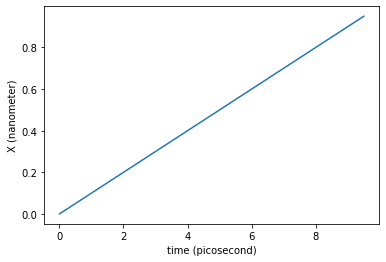

In [4]:
plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

And with external friction:

In [6]:
friction = 0.5 / unit.picoseconds

context.setPositions(initial_positions)
context.setVelocities(initial_velocities)
context.setTime(0.0*unit.picoseconds)

integrator.setFriction(friction)

# Reporter arrays: time, position, velocity, kinetic_energy, potential_energy

time = np.zeros([n_cicles], np.float32) * unit.picoseconds
position = np.zeros([n_cicles, n_particles, 3], np.float32) * unit.nanometers
velocity = np.zeros([n_cicles, n_particles, 3], np.float32) * unit.nanometers/unit.picosecond
kinetic_energy = np.zeros([n_cicles], np.float32) * unit.kilocalories_per_mole
potential_energy = np.zeros([n_cicles], np.float32) * unit.kilocalories_per_mole

# Initial context in reporters

state = context.getState(getPositions=True, getVelocities=True, getEnergy=True)
time[0] = state.getTime()
position[0] = state.getPositions()
velocity[0] = state.getVelocities()
kinetic_energy[0] = state.getKineticEnergy()
potential_energy[0] = state.getPotentialEnergy()

# Integration loop saving every cicle steps

for ii in range(1, n_cicles):
    context.getIntegrator().step(steps_per_cicle)
    state = context.getState(getPositions=True, getVelocities=True, getEnergy=True)
    time[ii] = state.getTime()
    position[ii] = state.getPositions()
    velocity[ii] = state.getVelocities()
    kinetic_energy[ii] = state.getKineticEnergy()
    potential_energy[ii] = state.getPotentialEnergy()

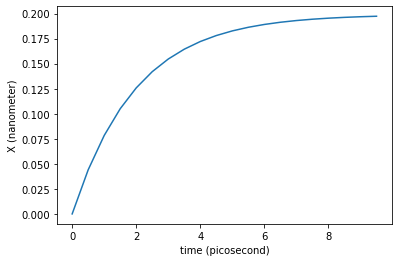

In [7]:
plt.plot(time, position[:,0,0])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

## Stochastic Dynamics

In [12]:
temperature = 300 * unit.kelvin
friction = 1.0 / unit.picoseconds

integration_timestep = 0.02 * unit.picoseconds
saving_timestep = 0.5 * unit.picoseconds
total_time = 0.5 * unit.nanoseconds

steps_per_cicle = round(saving_timestep/integration_timestep)
n_steps = round(total_time/integration_timestep)
n_cicles = round(n_steps/steps_per_cicle)

initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds
context.setPositions(initial_positions)
context.setVelocities(initial_velocities)
context.setTime(0.0*unit.picoseconds)

integrator.setFriction(friction)
integrator.setTemperature(temperature)

# Reporter arrays: time, position, velocity, kinetic_energy, potential_energy

time = np.zeros([n_cicles], np.float32) * unit.picoseconds
position = np.zeros([n_cicles, n_particles, 3], np.float32) * unit.nanometers
velocity = np.zeros([n_cicles, n_particles, 3], np.float32) * unit.nanometers/unit.picosecond
kinetic_energy = np.zeros([n_cicles], np.float32) * unit.kilocalories_per_mole
potential_energy = np.zeros([n_cicles], np.float32) * unit.kilocalories_per_mole

# Initial context in reporters

state = context.getState(getPositions=True, getVelocities=True, getEnergy=True)
time[0] = state.getTime()
position[0] = state.getPositions()
velocity[0] = state.getVelocities()
kinetic_energy[0] = state.getKineticEnergy()
potential_energy[0] = state.getPotentialEnergy()

# Integration loop saving every cicle steps

for ii in range(1, n_cicles):
    context.getIntegrator().step(steps_per_cicle)
    state = context.getState(getPositions=True, getVelocities=True, getEnergy=True)
    time[ii] = state.getTime()
    position[ii] = state.getPositions()
    velocity[ii] = state.getVelocities()
    kinetic_energy[ii] = state.getKineticEnergy()
    potential_energy[ii] = state.getPotentialEnergy()

We represent now the stochastic trajectory of our free particle along the axis $X$ in time:

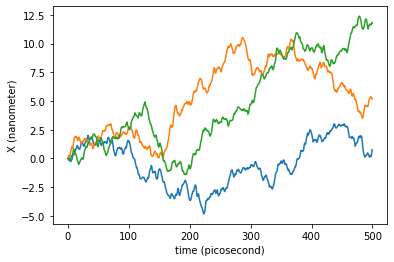

In [13]:
plt.plot(time, position[:,0,0])
plt.plot(time, position[:,0,1])
plt.plot(time, position[:,0,2])
plt.xlabel('time ({})'.format(time.unit))
plt.ylabel('X ({})'.format(position.unit))
plt.show()

Or over the plane $X,Y$:

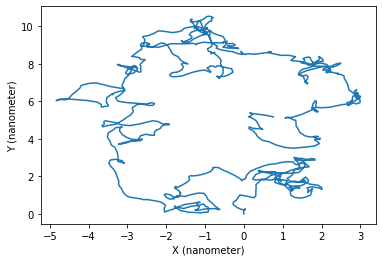

In [14]:
plt.plot(position[:,0,0], position[:,0,1])
plt.xlabel('X ({})'.format(position.unit))
plt.ylabel('Y ({})'.format(position.unit))
plt.show()